In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
arquivo = files.upload()

Saving Clientes-1.csv to Clientes-1.csv


Leitura dos arquivos

In [ ]:
dados_clientes = pd.read_csv('Clientes-1.csv',',')
dados_clientes_copia = dados_clientes.copy()
dados_clientes.head()

<ipython-input-3-d91064f2c7a2>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dados_clientes = pd.read_csv('Clientes-1.csv',',')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Preparação dos dados

In [ ]:
dados_clientes = dados_clientes.drop(['CustomerID'],axis=1)
print("Dataset modificado:")
print(dados_clientes.shape)

Dataset modificado:
(200, 4)


In [ ]:
dados_clientes

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
def index_of_dic(dic, key):
    return dic[key]

def StrList_to_UniqueIndexList(lista):
    group = set(lista)
    print(group)

    dic = {}
    i = 0
    for g in group:
        if g not in dic:
            dic[g] = i
            i += 1

    print(dic)
    return [index_of_dic(dic, p) for p in lista]


dados_clientes['Gender'] = StrList_to_UniqueIndexList(dados_clientes['Gender'])


display(dados_clientes_copia.head(5))
display(dados_clientes.head(5))

{'Male', 'Female'}
{'Male': 0, 'Female': 1}


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


Coloquei a faixa de valores para o número de clusters em 1,20 ao invés de 2,12. O gráfico Elbow mostra o melhor valor como sendo 5 quando a faixa fica entre 2 e 12. Porém, os resultados dos algoritmos apontam 6 como o melhor valor. Quando aplicada a faixa de 1,20, o valor 6 é representado como a melhor escolha no gráfico.

In [ ]:
Soma_distancia_quadratica = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dados_clientes)
    Soma_distancia_quadratica.append(km.inertia_)
print('Distâncias totais:')
Soma_distancia_quadratica

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Distâncias totais:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104434.82333370819,
 75427.71182424155,
 58348.641363315044,
 51203.75391673207,
 44357.32664902663,
 40629.17900056467,
 38185.11680782985,
 34756.46080864483,
 32444.95933973435,
 30281.622302860545,
 27618.634484023034,
 26319.242540955776,
 24955.825563053506,
 23159.914869281052,
 21792.211183261188,
 20630.56376678877]

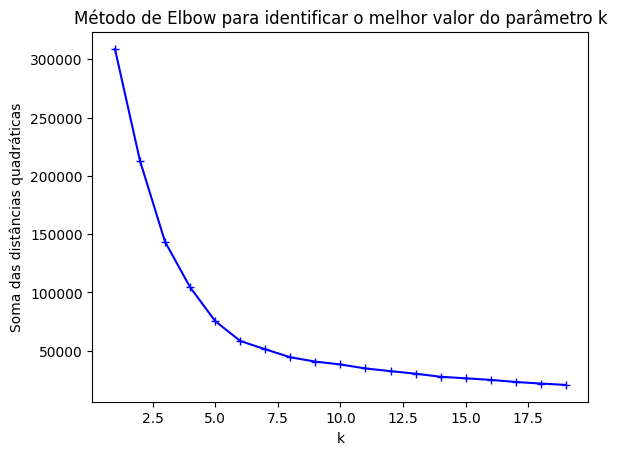

In [ ]:
plt.plot(K, Soma_distancia_quadratica, 'b+-')
plt.xlabel('k')
plt.ylabel('Soma das distâncias quadráticas')
plt.title('Método de Elbow para identificar o melhor valor do parâmetro k')
plt.show()

In [ ]:
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dados_clientes)
    s_score=metrics.silhouette_score(dados_clientes, km.labels_, metric='euclidean',sample_size=200)
    print('Para n_clusters=', k, 'o valor de silhouette_score é =', s_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Para n_clusters= 2 o valor de silhouette_score é = 0.29307334005502633
Para n_clusters= 3 o valor de silhouette_score é = 0.383798873822341
Para n_clusters= 4 o valor de silhouette_score é = 0.4052954330641215
Para n_clusters= 5 o valor de silhouette_score é = 0.44406692047430085
Para n_clusters= 6 o valor de silhouette_score é = 0.45135628286080426
Para n_clusters= 7 o valor de silhouette_score é = 0.44308105430733663
Para n_clusters= 8 o valor de silhouette_score é = 0.425945425758392


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters= 9 o valor de silhouette_score é = 0.39658075679929156
Para n_clusters= 10 o valor de silhouette_score é = 0.3880908972219034
Para n_clusters= 11 o valor de silhouette_score é = 0.36788558994453624


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters= 12 o valor de silhouette_score é = 0.3557681009056306
Para n_clusters= 13 o valor de silhouette_score é = 0.3378737646143948
Para n_clusters= 14 o valor de silhouette_score é = 0.3427153190115497


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters= 15 o valor de silhouette_score é = 0.34552300003644804
Para n_clusters= 16 o valor de silhouette_score é = 0.3527594616697682


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters= 17 o valor de silhouette_score é = 0.3335078699732646
Para n_clusters= 18 o valor de silhouette_score é = 0.3333225001617521


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters= 19 o valor de silhouette_score é = 0.3355389576042465


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para número de clusters = 2 O valor médio da silhouette é : 0.29307334005502633


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para número de clusters = 3 O valor médio da silhouette é : 0.383798873822341
Para número de clusters = 4 O valor médio da silhouette é : 0.4052954330641215


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para número de clusters = 5 O valor médio da silhouette é : 0.4440669204743008
Para número de clusters = 6 O valor médio da silhouette é : 0.45205475380756527


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para número de clusters = 7 O valor médio da silhouette é : 0.43949619264530887
Para número de clusters = 8 O valor médio da silhouette é : 0.4349105351263195


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para número de clusters = 9 O valor médio da silhouette é : 0.4080555594955236
Para número de clusters = 10 O valor médio da silhouette é : 0.3828606213726962


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para número de clusters = 11 O valor médio da silhouette é : 0.36560749066167425
Para número de clusters = 12 O valor médio da silhouette é : 0.35640244253976716


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para número de clusters = 13 O valor médio da silhouette é : 0.3362594224885134


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para número de clusters = 14 O valor médio da silhouette é : 0.3395080491088953
Para número de clusters = 15 O valor médio da silhouette é : 0.34767694576239305


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para número de clusters = 16 O valor médio da silhouette é : 0.3130551283136107


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para número de clusters = 17 O valor médio da silhouette é : 0.3400570733695139


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para número de clusters = 18 O valor médio da silhouette é : 0.33783346768342964


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para número de clusters = 19 O valor médio da silhouette é : 0.32894018760184984


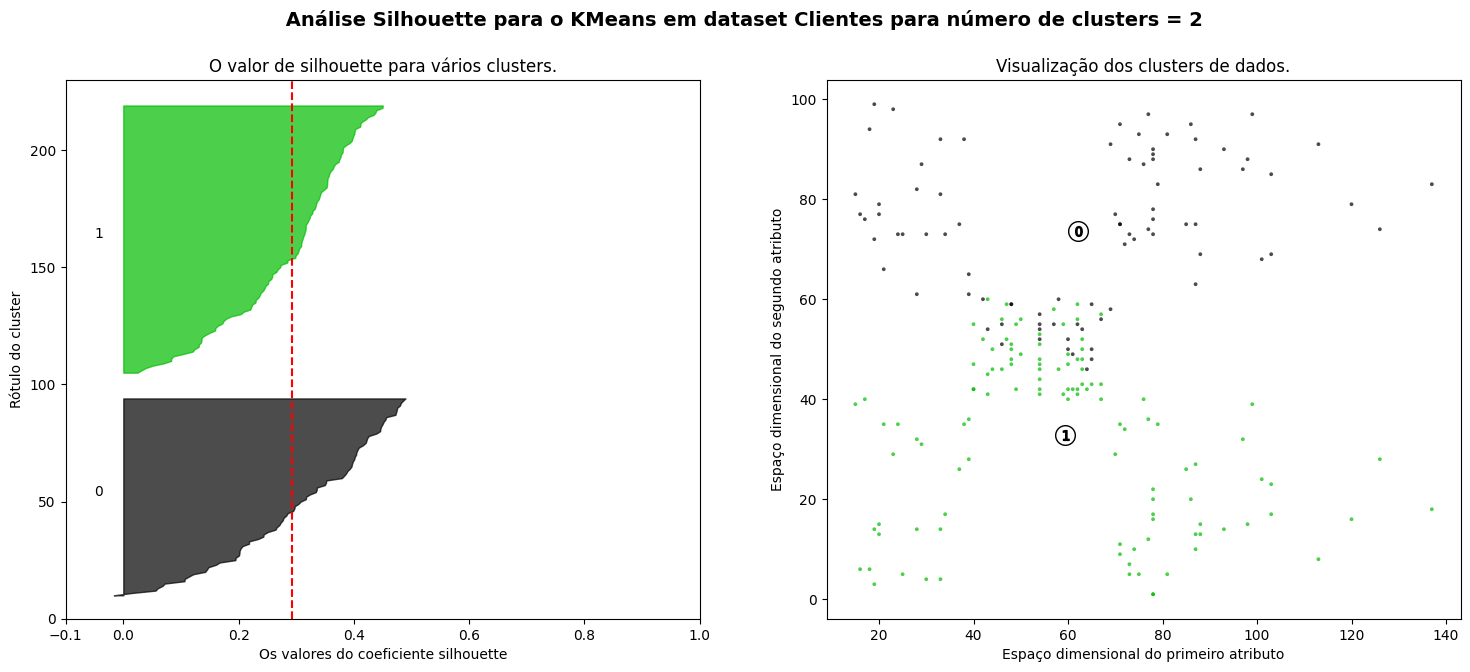

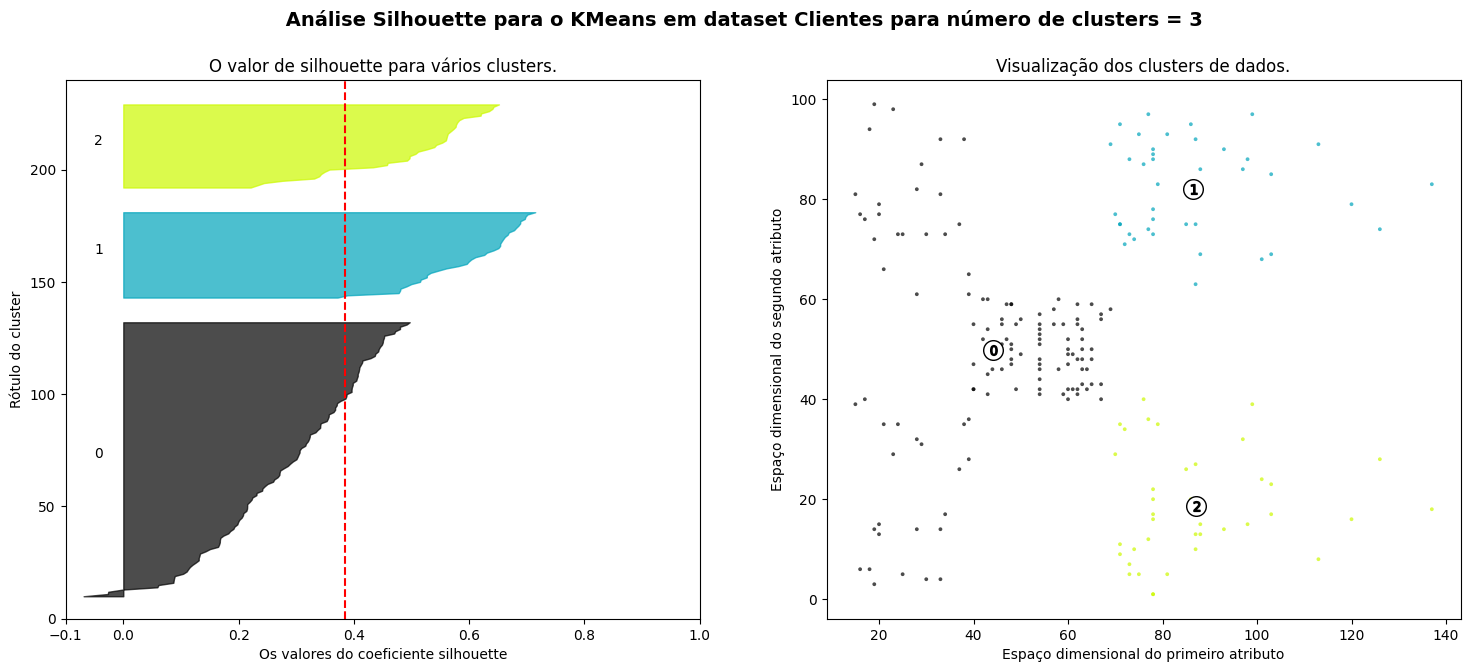

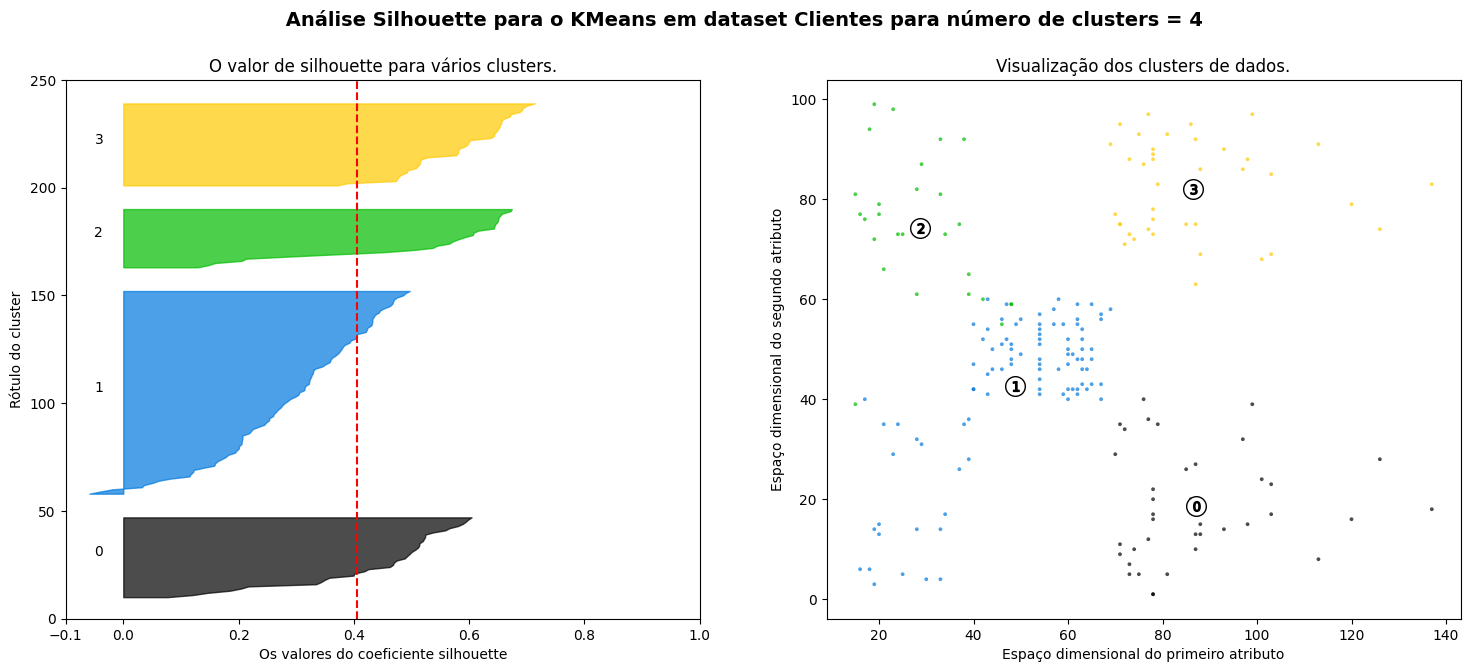

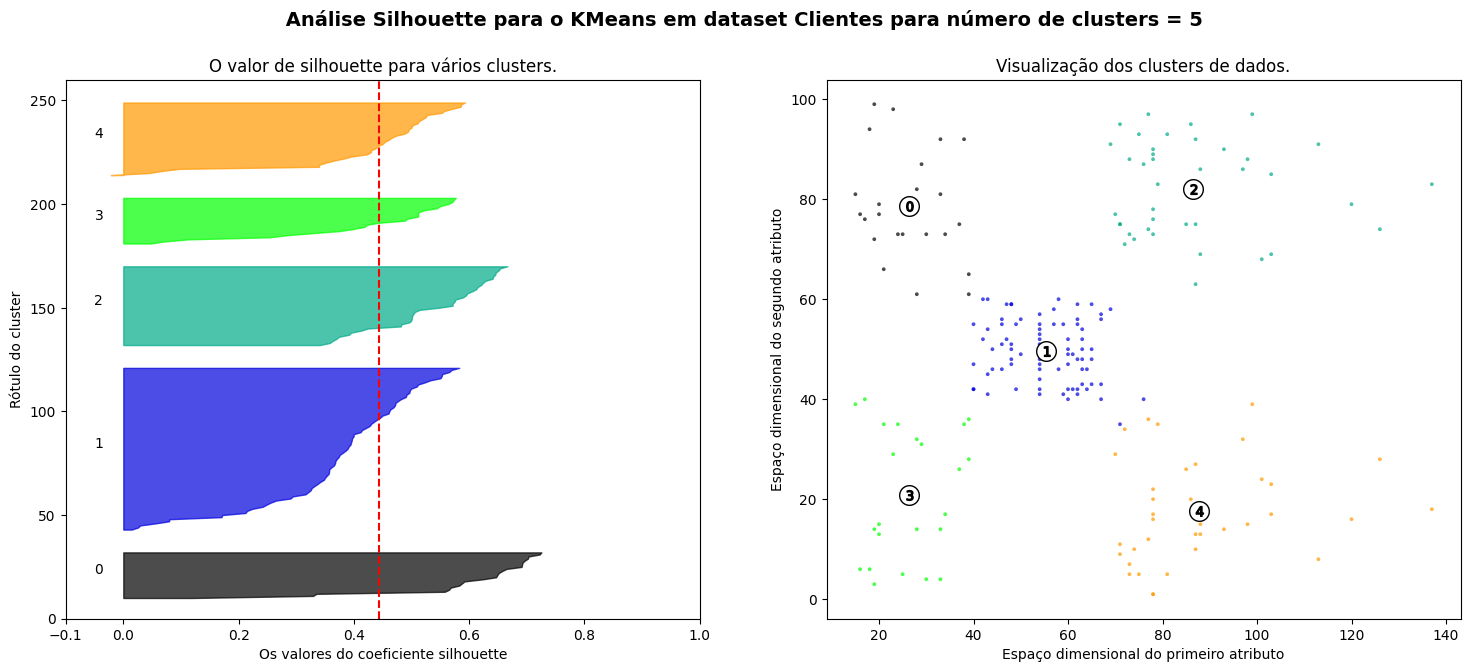

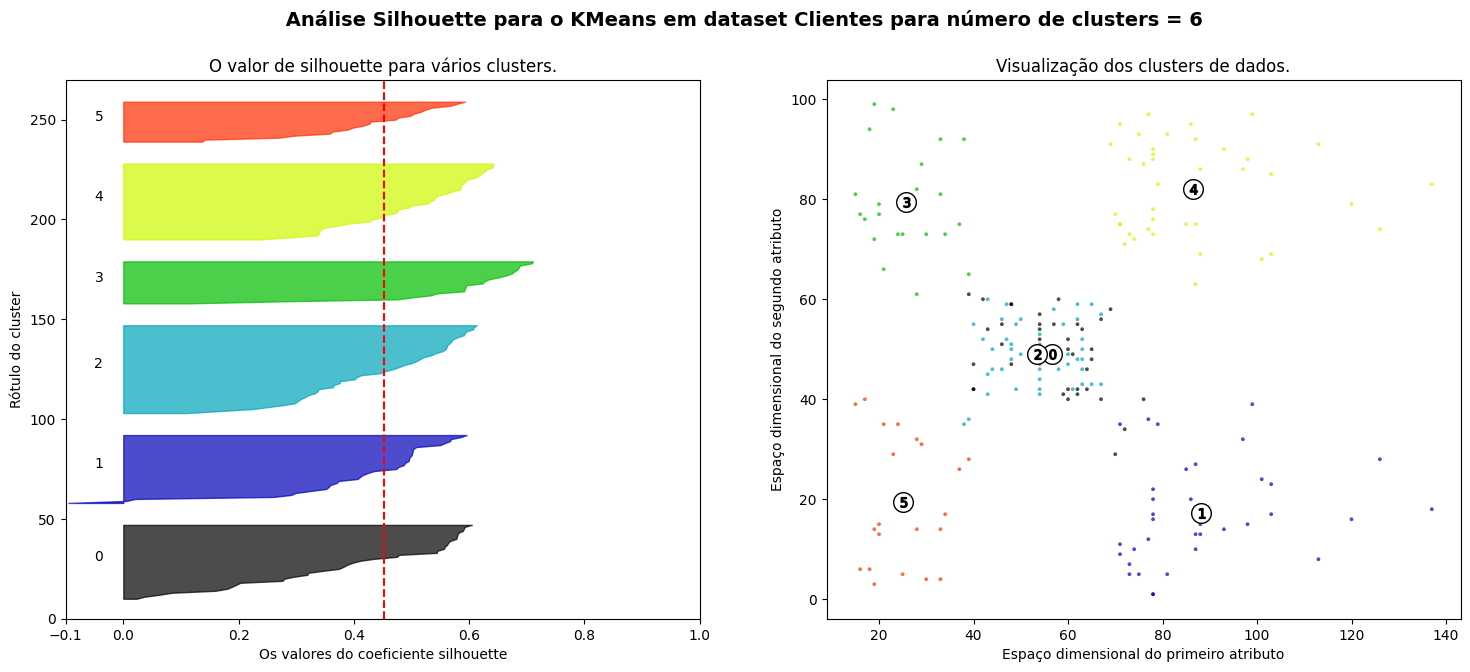

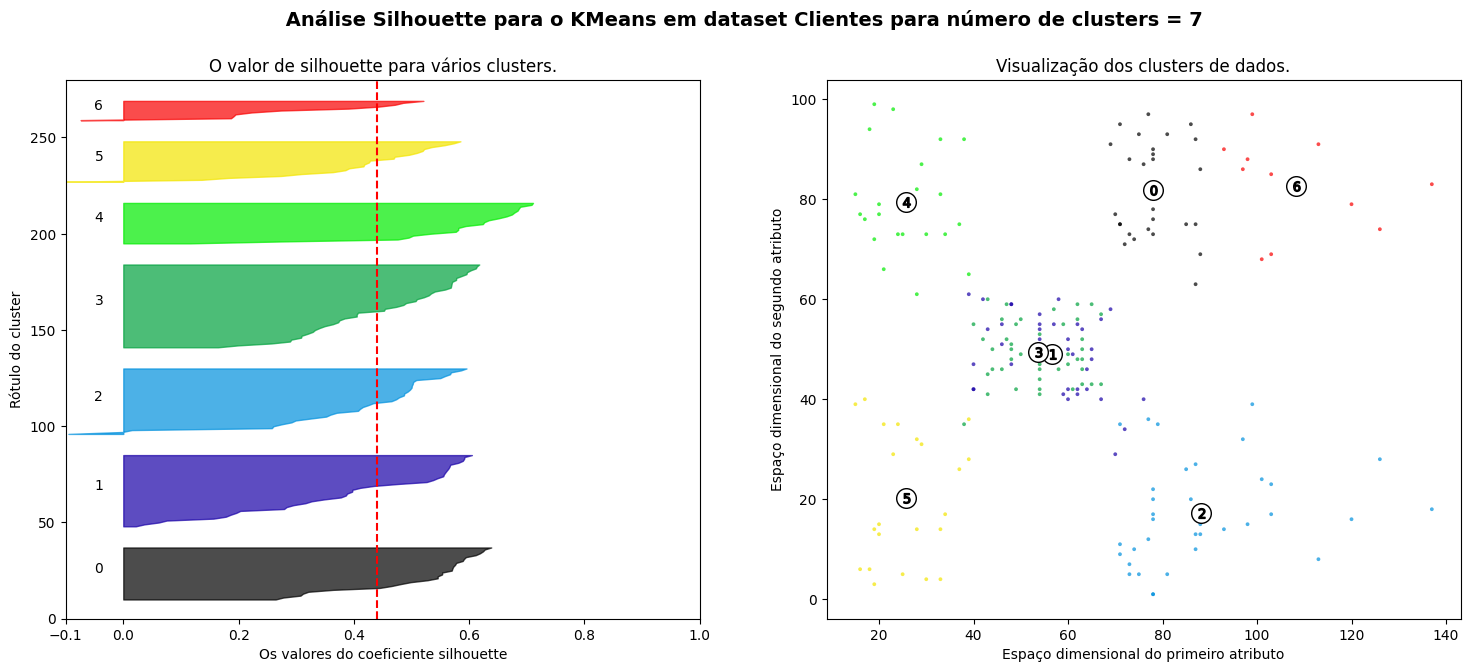

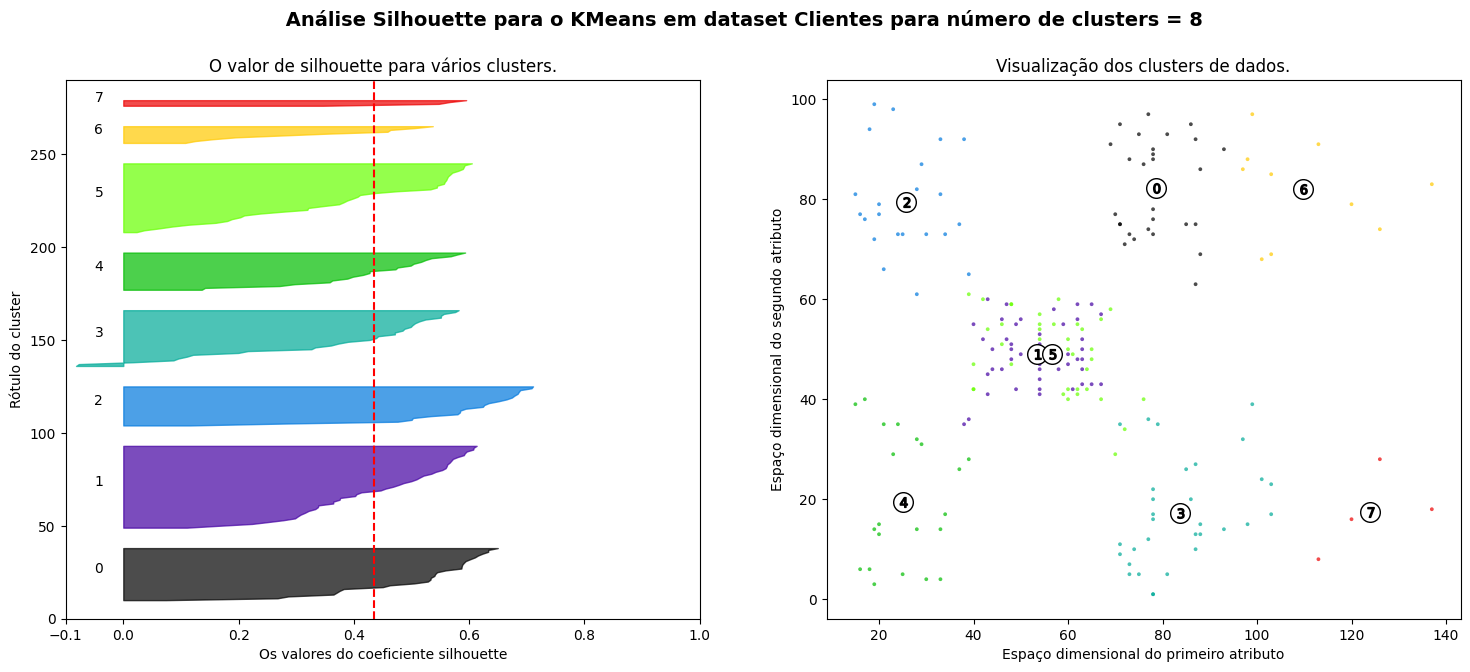

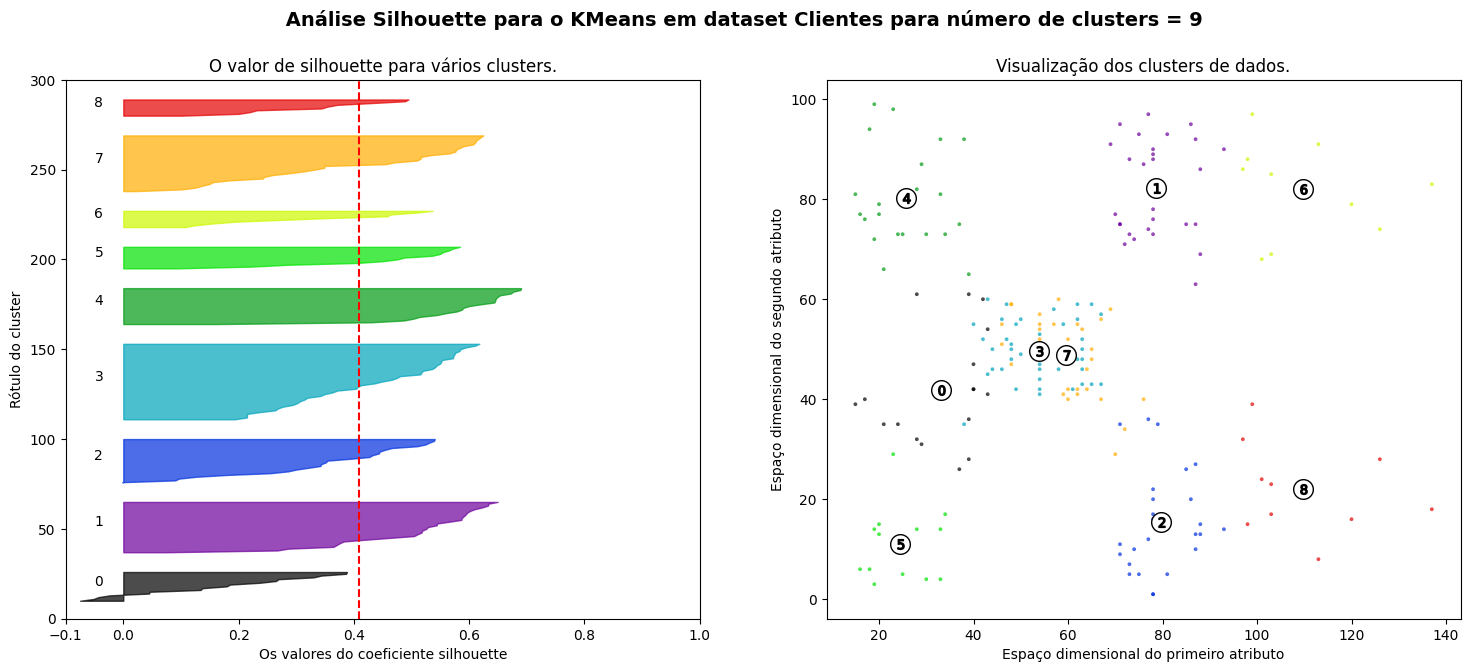

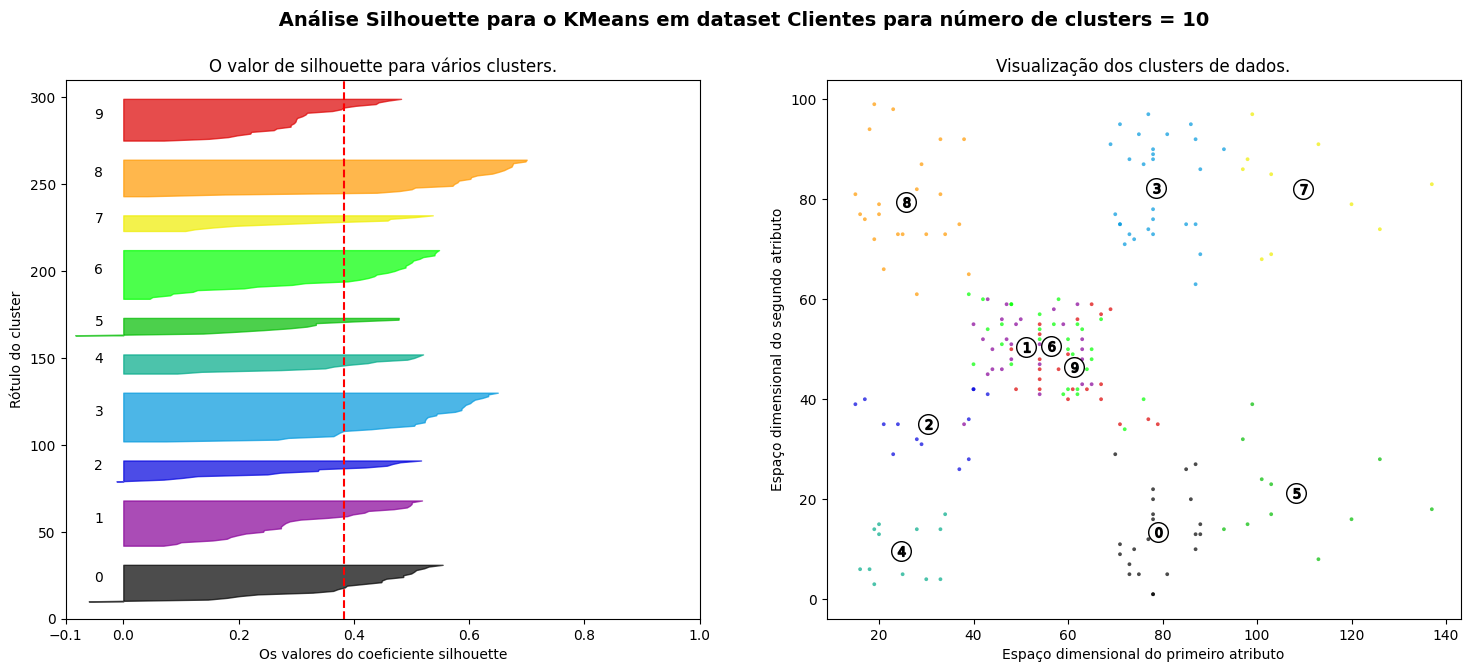

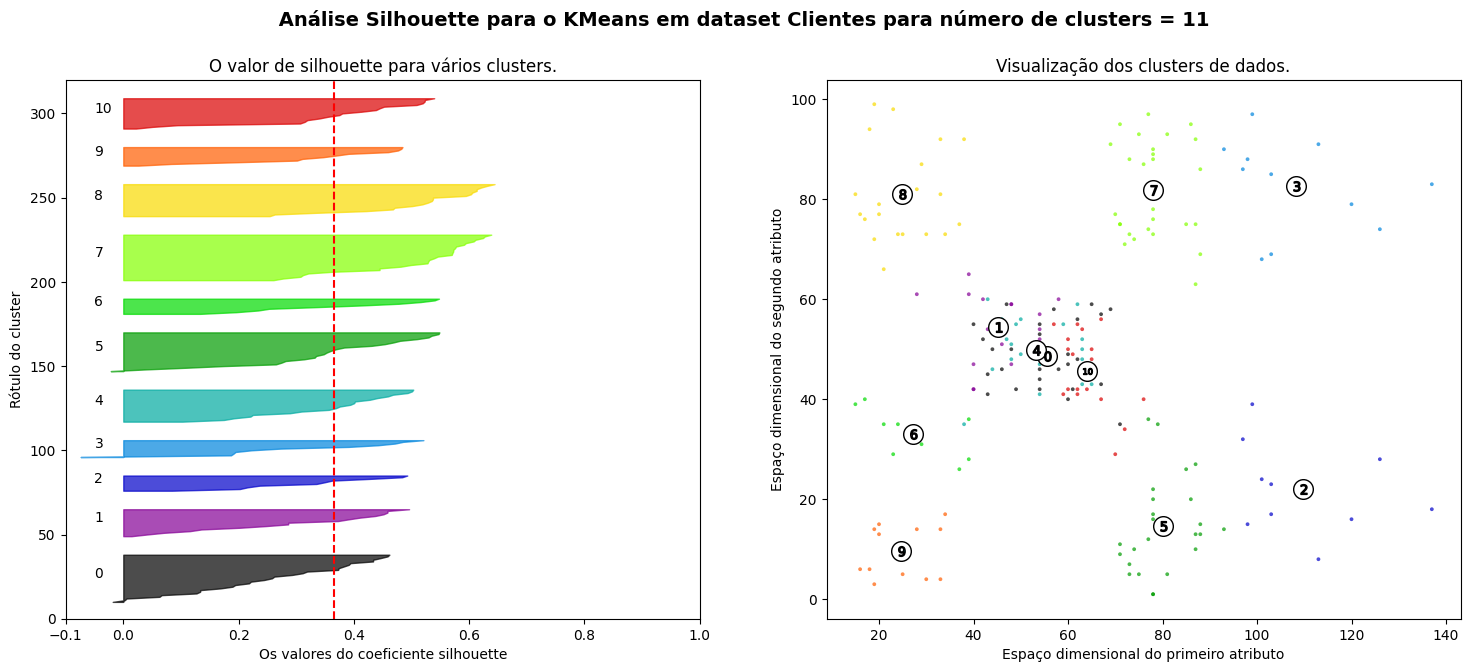

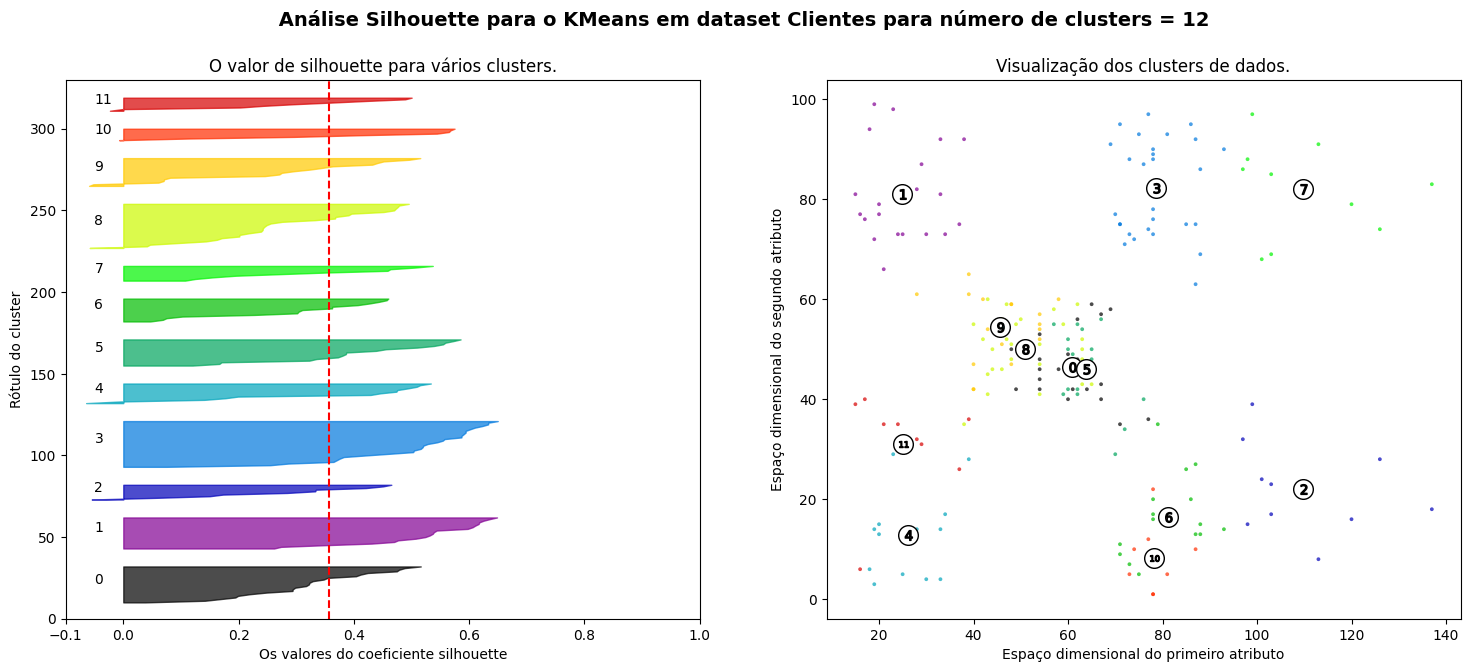

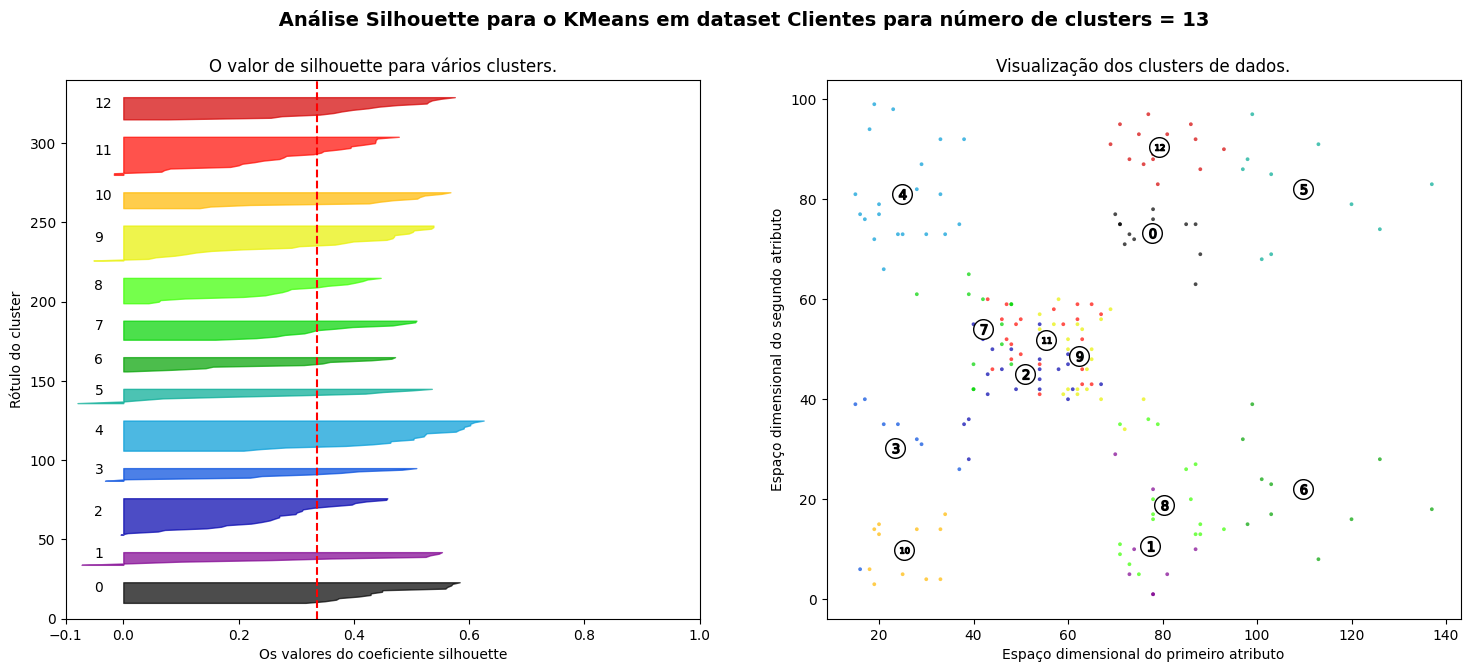

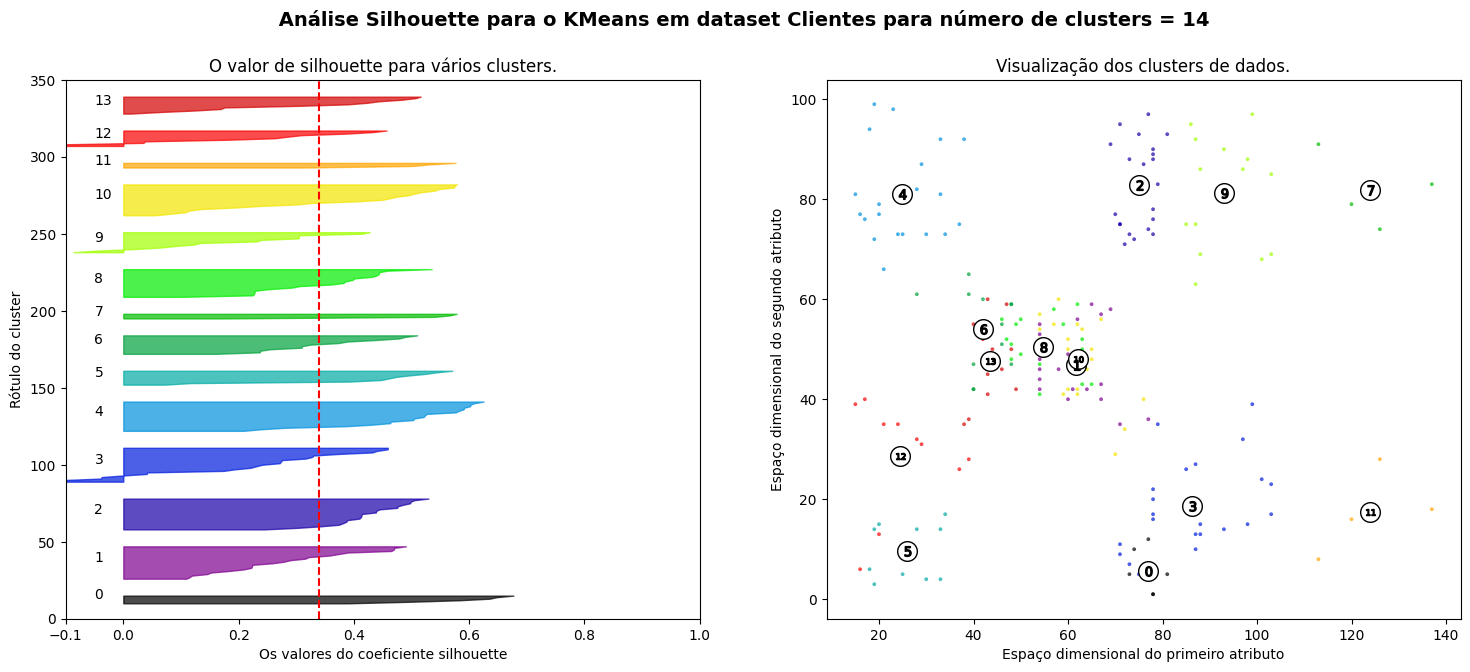

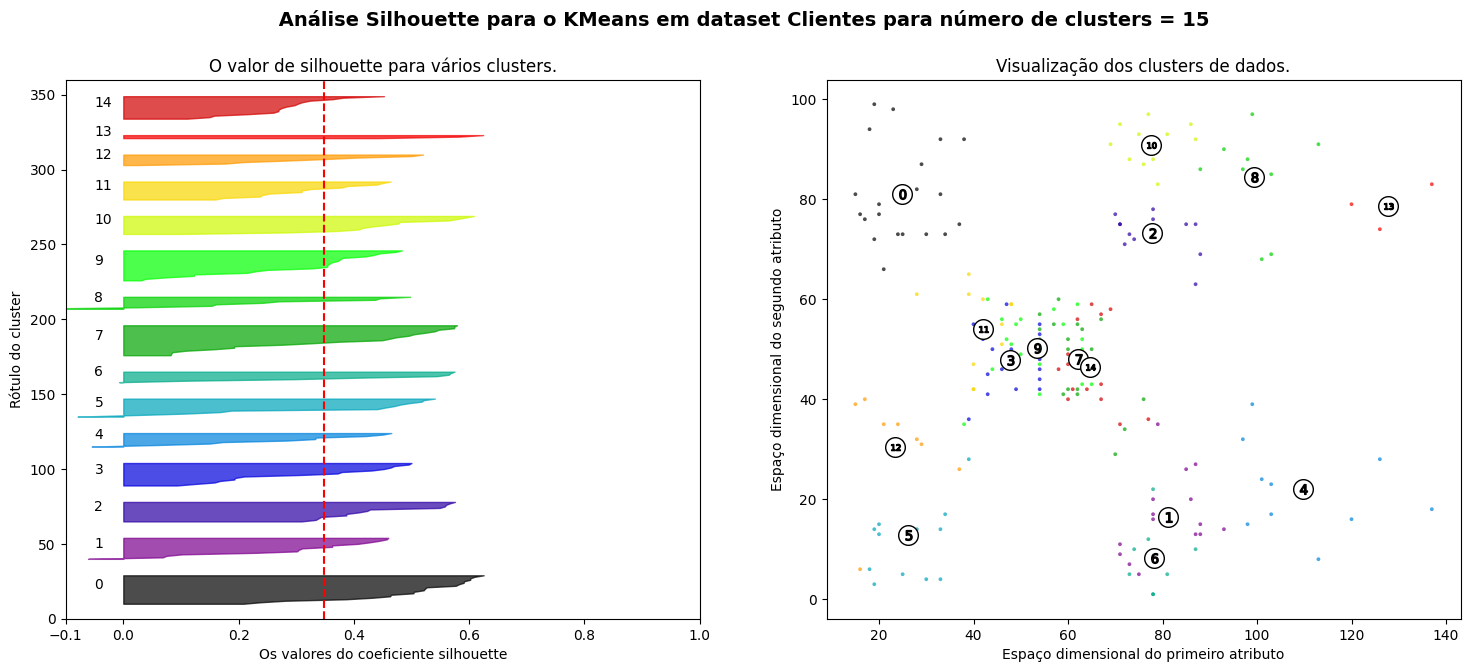

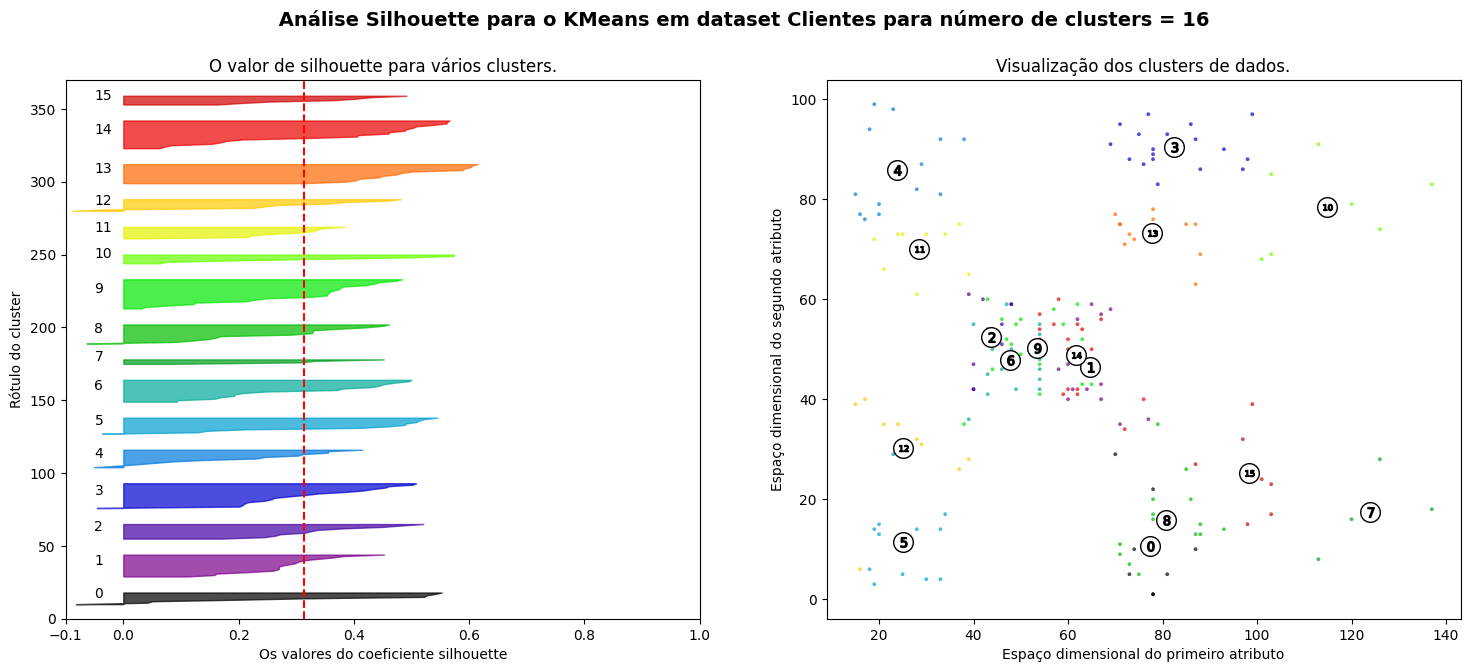

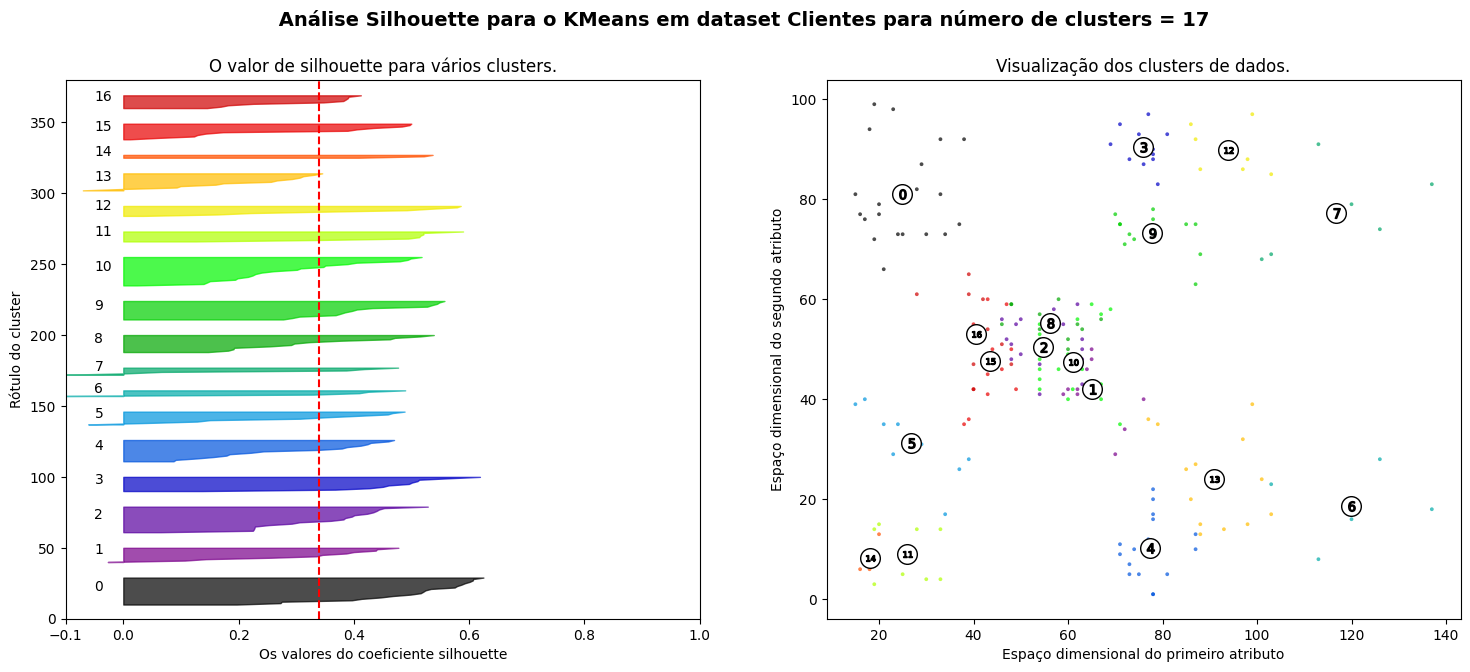

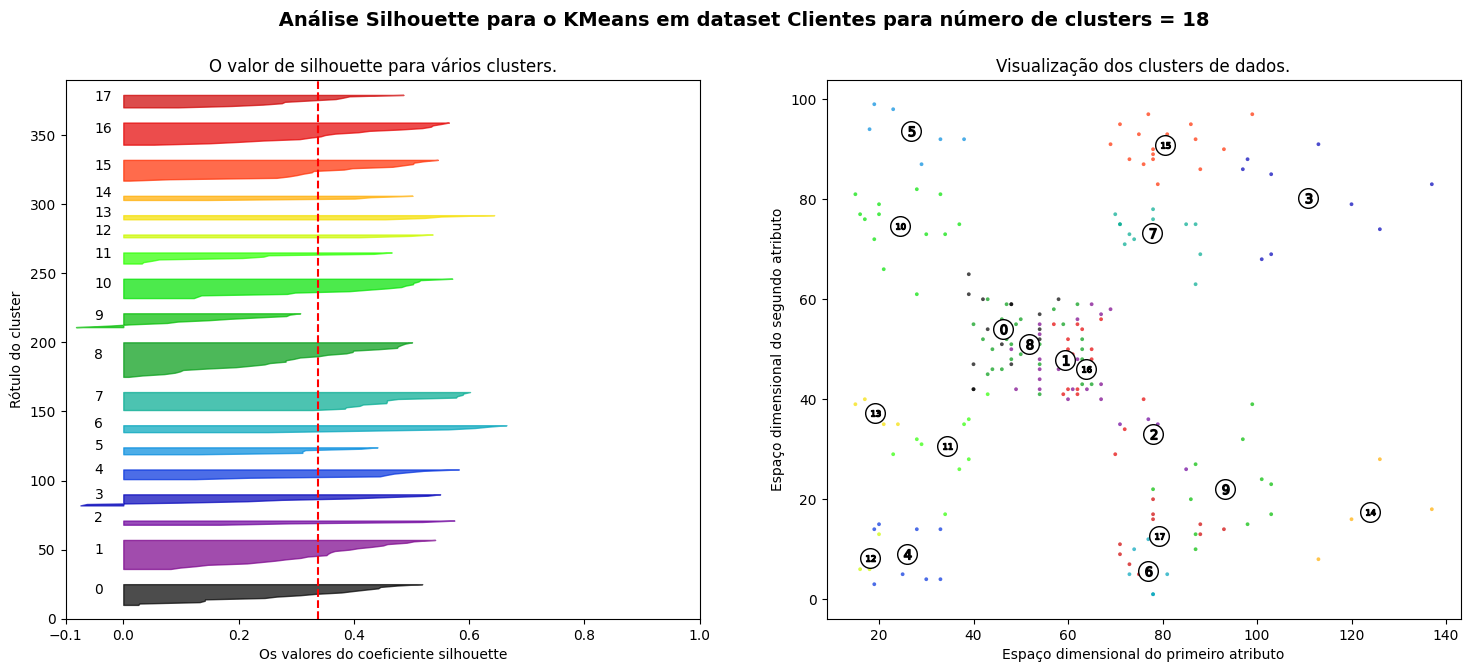

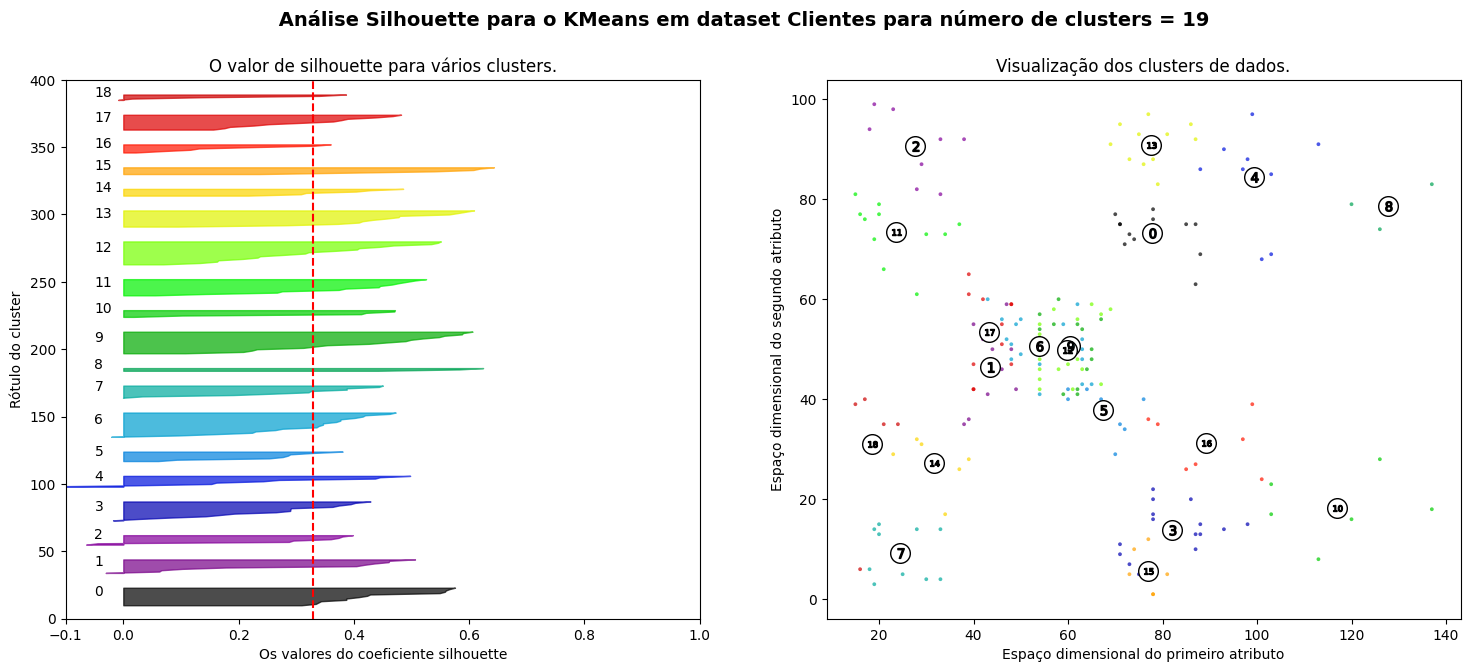

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
X = dados_clientes.values[:, :5]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para número de clusters =", n_clusters,
          "O valor médio da silhouette é :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("O valor de silhouette para vários clusters.")
    ax1.set_xlabel("Os valores do coeficiente silhouette")
    ax1.set_ylabel("Rótulo do cluster")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 2], X[:, 3], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 2], centers[:, 3], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[2], c[3], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("Visualização dos clusters de dados.")
    ax2.set_xlabel("Espaço dimensional do primeiro atributo")
    ax2.set_ylabel("Espaço dimensional do segundo atributo")
    plt.suptitle((" Análise Silhouette para o KMeans em dataset Clientes "
                  "para número de clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km_melhor_execucao = KMeans(n_clusters=5)
km_melhor_execucao = km_melhor_execucao.fit(dados_clientes)
print(km_melhor_execucao.cluster_centers_)

[[ 0.60869565 45.2173913  26.30434783 20.91304348]
 [ 0.5875     42.9375     55.0875     49.7125    ]
 [ 0.47222222 40.66666667 87.75       17.58333333]
 [ 0.53846154 32.69230769 86.53846154 82.12820513]
 [ 0.59090909 25.27272727 25.72727273 79.36363636]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


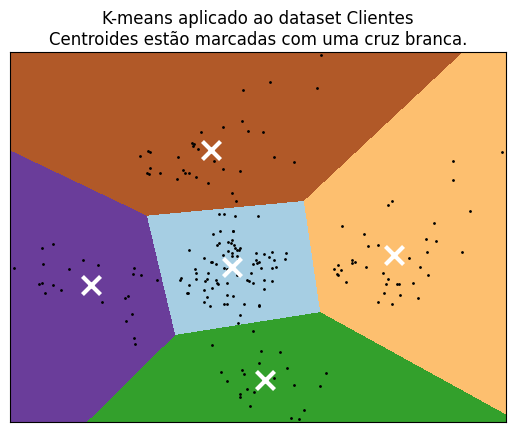

Pontos das centróides:
[[ -4.41026389  -3.10070422]
 [  4.98536192 -46.67336912]
 [ 41.55103875   1.87087541]
 [-44.38675468 -10.05043814]
 [-10.22445521  42.33140596]]
Instâncias clusterizadas:
[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [ ]:
numero_clusteres = 5
reduced_data = PCA(n_components=2).fit_transform(dados_clientes)
kmeans = KMeans(init='k-means++', n_clusters=numero_clusteres, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means aplicado ao dataset Clientes\n'
          'Centroides estão marcadas com uma cruz branca.')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
print("Pontos das centróides:")
print(kmeans.cluster_centers_)
print("Instâncias clusterizadas:")
print(kmeans.labels_)

In [ ]:
display(dados_clientes)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [ ]:
kmeans_model = KMeans(n_clusters=5)
y_cluster = kmeans_model.fit_predict(dados_clientes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.tree import _tree, DecisionTreeClassifier

In [ ]:
from IPython.display import display, HTML
from matplotlib import pyplot as plt
from pdb import set_trace
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set()

In [ ]:
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
    inner_tree: _tree.Tree = tree.tree_
    classes = tree.classes_
    class_rules_dict = dict()

    def tree_dfs(node_id=0, current_rule=[]):
        split_feature = inner_tree.feature[node_id]
        if split_feature != _tree.TREE_UNDEFINED:  # nó interno
            name = feature_names[split_feature]
            threshold = inner_tree.threshold[node_id]
            left_rule = current_rule + ["({} <= {})".format(name, threshold)]
            tree_dfs(inner_tree.children_left[node_id], left_rule)
            right_rule = current_rule + ["({} > {})".format(name, threshold)]
            tree_dfs(inner_tree.children_right[node_id], right_rule)
        else:  # folha
            dist = inner_tree.value[node_id][0]
            dist = dist / dist.sum()
            max_idx = dist.argmax()
            if len(current_rule) == 0:
                rule_string = "ALL"
            else:
                rule_string = " and ".join(current_rule)
            selected_class = classes[max_idx]
            class_probability = dist[max_idx]
            class_rules = class_rules_dict.get(selected_class, [])
            class_rules.append((rule_string, class_probability))
            class_rules_dict[selected_class] = class_rules

    tree_dfs()
    return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    print(tree)
    tree.fit(data, clusters)

    # Generate Report
    feature_names = data.columns
    print(feature_names)
    class_rule_dict = get_class_rules(tree, feature_names)
    print(class_rule_dict)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        print(class_name)
        rule_list = class_rule_dict[class_name]
        print(rule_list)
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))

    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    #report_df['rule_list'].fillna('No rules generated', inplace=True)
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])


In [ ]:
cluster_report(dados_clientes, y_cluster, min_samples_leaf=20, pruning_level=0.05)

DecisionTreeClassifier(ccp_alpha=0.05, min_samples_leaf=20)
Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
{3: [('(Annual Income (k$) <= 69.5) and (Annual Income (k$) <= 39.5) and (Spending Score (1-100) <= 50.5)', 1.0)], 4: [('(Annual Income (k$) <= 69.5) and (Annual Income (k$) <= 39.5) and (Spending Score (1-100) > 50.5)', 1.0)], 2: [('(Annual Income (k$) <= 69.5) and (Annual Income (k$) > 39.5)', 0.9871794871794872)], 1: [('(Annual Income (k$) > 69.5) and (Spending Score (1-100) <= 51.5)', 0.9473684210526315)], 0: [('(Annual Income (k$) > 69.5) and (Spending Score (1-100) > 51.5)', 1.0)]}
3
[('(Annual Income (k$) <= 69.5) and (Annual Income (k$) <= 39.5) and (Spending Score (1-100) <= 50.5)', 1.0)]
4
[('(Annual Income (k$) <= 69.5) and (Annual Income (k$) <= 39.5) and (Spending Score (1-100) > 50.5)', 1.0)]
2
[('(Annual Income (k$) <= 69.5) and (Annual Income (k$) > 39.5)', 0.9871794871794872)]
1
[('(Annual Income (k$) > 69.5) and (Spending

,class_name,instance_count,rule_list
1,0,39,[1.0] (Annual Income (k$) > 69.5) and (Spending Score (1-100) > 51.5)
2,1,36,[0.9473684210526315] (Annual Income (k$) > 69.5) and (Spending Score (1-100) <= 51.5)
0,2,79,[0.9871794871794872] (Annual Income (k$) <= 69.5) and (Annual Income (k$) > 39.5)
3,3,23,[1.0] (Annual Income (k$) <= 69.5) and (Annual Income (k$) <= 39.5) and (Spending Score (1-100) <= 50.5)
4,4,23,[1.0] (Annual Income (k$) <= 69.5) and (Annual Income (k$) <= 39.5) and (Spending Score (1-100) > 50.5)


In [ ]:
dados_cluster = dados_clientes

In [ ]:
dados_cluster['Cluster'] = y_cluster

In [ ]:
display(dados_cluster)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,3
1,0,21,15,81,4
2,1,20,16,6,3
3,1,23,16,77,4
4,1,31,17,40,3
...,...,...,...,...,...
195,1,35,120,79,0
196,1,45,126,28,1
197,0,32,126,74,0
198,0,32,137,18,1
